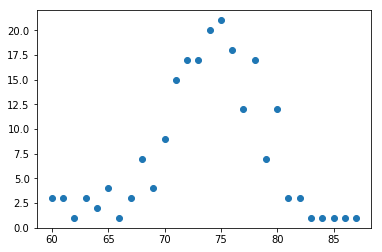

In [200]:
import numpy as np
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt

filename = '../data/50_1002.txt'

channel = np.linspace(0,255, num=256)
values = np.loadtxt(filename)



vfunc = np.vectorize(lambda t: 1 if t == 0 else t)

values = vfunc(values)

plotFrom = 60
plotTo = 88
plt.scatter(channel[plotFrom:plotTo], values[plotFrom:plotTo])

[ 7.44235609e+01  2.68367344e+00  1.28365569e+02  2.67542346e+05
 -1.32968306e+01] [inf inf inf inf inf]


/home/dumbo/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


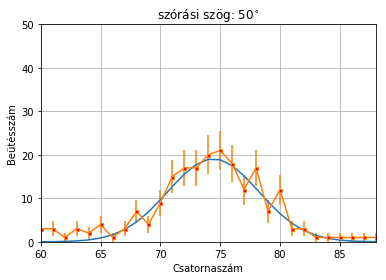

In [199]:
error = np.sqrt(values)

startVal = 60
endVal = 86

def gauss(x, m, s, A, bA, bb):
    return A/(np.sqrt(2*np.pi)*s)*np.exp(-((x-m)/(2*s))**2) + bA*np.exp(bb*x)

x0 = np.array([91.,6., 220., 330., -.13])

params, cov = optimization.curve_fit(gauss, channel[startVal:endVal], values[startVal:endVal],
                                     x0, error[startVal:endVal])
perr = np.sqrt(np.diag(cov))

plt.plot(channel, gauss(channel, *params))
plt.errorbar(channel, values, error, marker='s', mfc='red', ms=3)
plt.xlim(plotFrom,plotTo)
plt.ylim(0,50)
plt.title('szórási szög: 50$^{\circ}$')
plt.xlabel('Csatornaszám')
plt.ylabel('Beütésszám')
plt.grid(True)
plt.savefig('../plots/withbackground/50_1002fit.png')

print(params, perr)

In [194]:
np.savetxt('../gaussfits/withbackground/40_1085fit.dat', (params, perr))